In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')  
import seaborn as sb
import datetime as dt

In [5]:
# read in dataset
sales_df = pd.read_excel("C:\\Users\\PAVANI\\Downloads\\online_retail.xlsx")
sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
#check last five rows
sales_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
# random data sampling
sales_df.sample(8)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
34817,539434,20754,RETROSPOT RED WASHING UP GLOVES,3,2010-12-17 14:41:00,4.21,NaN,United Kingdom
118493,546434,84997D,CHILDRENS CUTLERY POLKADOT PINK,4,2011-03-14 08:41:00,4.15,12383.0,Belgium
240499,558104,21174,POTTERING IN THE SHED METAL SIGN,4,2011-06-26 14:28:00,2.08,13668.0,United Kingdom
421877,573029,84032A,CHARLIE+LOLA PINK HOT WATER BOTTLE,1,2011-10-27 13:33:00,2.95,14971.0,United Kingdom
331557,566018,23200,JUMBO BAG PEARS,4,2011-09-08 12:42:00,2.08,13137.0,United Kingdom
54120,540856,22848,BREAD BIN DINER STYLE PINK,1,2011-01-12 10:16:00,16.95,16655.0,United Kingdom
518302,580115,22539,MINI JIGSAW DOLLY GIRL,1,2011-12-01 16:22:00,0.83,NaN,United Kingdom
20572,538065,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-09 13:57:00,2.55,13982.0,United Kingdom


In [5]:
# find number of columns and rows
sales_df.shape

(541909, 8)

In [6]:
#summary statistics of data
sales_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
#check for data type of each column
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
#find columns with missing values
sales_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
#number of unique countries
sales_df['Country'].nunique()

38

In [10]:
#check for duplicate invoices
sales_df[sales_df.duplicated('InvoiceNo')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [11]:
#Number of unique invoice numbers
sales_df['InvoiceNo'].nunique()

25900

In [12]:
#quantity of items less than zero(0)
sales_df[sales_df['Quantity'] <= 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [13]:
#price of items <= 0 cents
sales_df[sales_df['UnitPrice'] < 1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France
38,536370,22661,CHARLOTTE BAG DOLLY GIRL DESIGN,20,2010-12-01 08:45:00,0.85,12583.0,France
42,536370,22540,MINI JIGSAW CIRCUS PARADE,24,2010-12-01 08:45:00,0.42,12583.0,France
...,...,...,...,...,...,...,...,...
541883,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-12-09 12:31:00,0.42,15804.0,United Kingdom
541885,581585,21684,SMALL MEDINA STAMPED METAL BOWL,12,2011-12-09 12:31:00,0.85,15804.0,United Kingdom
541886,581585,22398,MAGNETS PACK OF 4 SWALLOWS,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom
541888,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-12-09 12:31:00,0.95,15804.0,United Kingdom


In [14]:
# calculate total revenue per sale

sales_df['UnitPrice'] =sales_df['UnitPrice'].round(decimals = 1)
sales_df['AmountPaid'] = (sales_df['UnitPrice'] * sales_df['Quantity']).round(decimals = 1).astype(int)
sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountPaid
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.6,17850.0,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850.0,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20


In [15]:
# filter out inconsistent observations:inconsistent prices

filtered_df = sales_df.loc[(sales_df['Quantity'] >=  1) & (sales_df['UnitPrice'] >= 1)].reset_index(drop = True).copy()
filtered_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountPaid
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.6,17850.0,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850.0,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom,20


In [16]:
#check that inconsistent observations are filtered out 
print(filtered_df[filtered_df['UnitPrice'] < 1])
filtered_df[filtered_df['Quantity'] < 1]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, AmountPaid]
Index: []


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountPaid


In [17]:
#convert customer id data type to string
#first remove the decimal points
filtered_df['CustomerID'] = filtered_df['CustomerID'].apply(lambda x: f'{x:.0f}')
filtered_df['CustomerID'] = filtered_df['CustomerID'].astype('str')
print(filtered_df.info())
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420738 entries, 0 to 420737
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    420738 non-null  object        
 1   StockCode    420738 non-null  object        
 2   Description  420738 non-null  object        
 3   Quantity     420738 non-null  int64         
 4   InvoiceDate  420738 non-null  datetime64[ns]
 5   UnitPrice    420738 non-null  float64       
 6   CustomerID   420738 non-null  object        
 7   Country      420738 non-null  object        
 8   AmountPaid   420738 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(5)
memory usage: 27.3+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountPaid
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.6,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850,United Kingdom,20


In [18]:
filtered_df['CustomerID'].fillna('Not provided',inplace = True)

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420738 entries, 0 to 420737
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    420738 non-null  object        
 1   StockCode    420738 non-null  object        
 2   Description  420738 non-null  object        
 3   Quantity     420738 non-null  int64         
 4   InvoiceDate  420738 non-null  datetime64[ns]
 5   UnitPrice    420738 non-null  float64       
 6   CustomerID   420738 non-null  object        
 7   Country      420738 non-null  object        
 8   AmountPaid   420738 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(5)
memory usage: 27.3+ MB


In [19]:

filtered_df['InvoiceDate1'] = filtered_df['InvoiceDate'].dt.strftime('%Y-%m-%d')
filtered_df['Month'] = filtered_df['InvoiceDate'].dt.month_name()
filtered_df['Day'] = filtered_df['InvoiceDate'].dt.day_name()
filtered_df['Quarter'] = filtered_df['InvoiceDate'].dt.quarter
filtered_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountPaid,InvoiceDate1,Month,Day,Quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.6,17850,United Kingdom,15,2010-12-01,December,Wednesday,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850,United Kingdom,20,2010-12-01,December,Wednesday,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.8,17850,United Kingdom,22,2010-12-01,December,Wednesday,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850,United Kingdom,20,2010-12-01,December,Wednesday,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850,United Kingdom,20,2010-12-01,December,Wednesday,4


In [20]:
print(filtered_df['InvoiceDate'].max())

filtered_df['InvoiceDate'].min()

2011-12-09 12:50:00


Timestamp('2010-12-01 08:26:00')

In [21]:
filtered_df['Day'].unique() 

array(['Wednesday', 'Thursday', 'Friday', 'Sunday', 'Monday', 'Tuesday'],
      dtype=object)

In [22]:
#months included in the dataset
filtered_df['Month'].unique()

array(['December', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November'], dtype=object)

In [23]:
filtered_df['CustomerID'].nunique()

4305

In [24]:
filtered_df['CustomerID'].value_counts(normalize = True)

nan      0.271941
17841    0.014004
14096    0.010793
14911    0.010384
12748    0.007725
           ...   
13185    0.000002
16742    0.000002
15070    0.000002
14424    0.000002
17923    0.000002
Name: CustomerID, Length: 4305, dtype: float64

In [25]:
filtered_df.drop('InvoiceDate', axis = 1, inplace = True)

In [26]:
filtered_df.rename(columns = {'InvoiceDate1':'InvoiceDate'}, inplace = True)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420738 entries, 0 to 420737
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    420738 non-null  object 
 1   StockCode    420738 non-null  object 
 2   Description  420738 non-null  object 
 3   Quantity     420738 non-null  int64  
 4   UnitPrice    420738 non-null  float64
 5   CustomerID   420738 non-null  object 
 6   Country      420738 non-null  object 
 7   AmountPaid   420738 non-null  int32  
 8   InvoiceDate  420738 non-null  object 
 9   Month        420738 non-null  object 
 10  Day          420738 non-null  object 
 11  Quarter      420738 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 36.9+ MB


In [27]:
filtered_df['InvoiceDate'] = pd.to_datetime(filtered_df['InvoiceDate'])
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420738 entries, 0 to 420737
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    420738 non-null  object        
 1   StockCode    420738 non-null  object        
 2   Description  420738 non-null  object        
 3   Quantity     420738 non-null  int64         
 4   UnitPrice    420738 non-null  float64       
 5   CustomerID   420738 non-null  object        
 6   Country      420738 non-null  object        
 7   AmountPaid   420738 non-null  int32         
 8   InvoiceDate  420738 non-null  datetime64[ns]
 9   Month        420738 non-null  object        
 10  Day          420738 non-null  object        
 11  Quarter      420738 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(7)
memory usage: 36.9+ MB


In [28]:
#rename countries-'Eire' and 'RSA'
filtered_df['Country'] = filtered_df['Country'].replace(['EIRE','RSA'],['Ireland','South Africa'])

In [29]:
filtered_df.describe()

,Quantity,UnitPrice,AmountPaid,Quarter
count,420738.000000,420738.000000,420738.000000,420738.000000
mean,8.274045,4.766621,22.434755,2.830457
std,171.630310,40.271303,303.455433,1.143278
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.600000,4.000000,2.000000
50%,3.000000,2.900000,12.000000,3.000000
75%,8.000000,5.000000,19.000000,4.000000
max,80995.000000,13541.300000,170089.000000,4.000000


In [30]:
#check final dataframe

filtered_df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,AmountPaid,InvoiceDate,Month,Day,Quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.6,17850,United Kingdom,15,2010-12-01,December,Wednesday,4
1,536365,71053,WHITE METAL LANTERN,6,3.4,17850,United Kingdom,20,2010-12-01,December,Wednesday,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.8,17850,United Kingdom,22,2010-12-01,December,Wednesday,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.4,17850,United Kingdom,20,2010-12-01,December,Wednesday,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.4,17850,United Kingdom,20,2010-12-01,December,Wednesday,4


# EXPLORATORY ANALYSIS


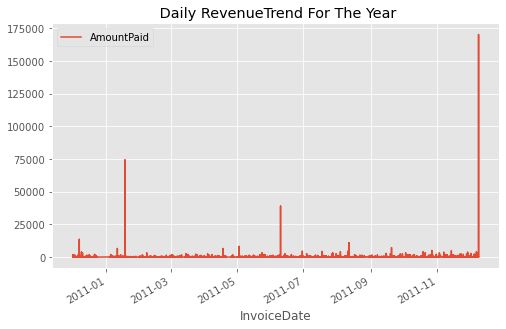

In [31]:
sales_trend = filtered_df[['InvoiceDate', 'AmountPaid']]
sales_trend.set_index('InvoiceDate').plot.line(figsize = (8,5)).set_title(' Daily RevenueTrend For The Year');

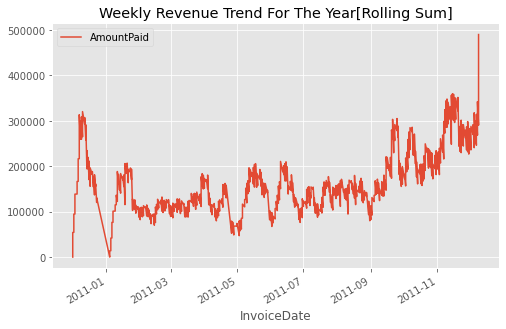

In [32]:

sales_trend.set_index('InvoiceDate').rolling('7D').sum().plot(figsize = (8,5)).set_title(
    'Weekly Revenue Trend For The Year[Rolling Sum]');

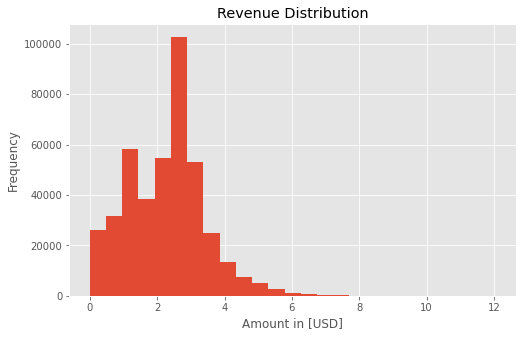

In [33]:
#revenue distribution
plt.figure(figsize = (8,5))
plt.hist( np.log(filtered_df['AmountPaid']), bins = 25)
plt.xlabel('Amount in [USD]')
plt.ylabel('Frequency')
plt.title('Revenue Distribution');

In [34]:
#average sales per day
avg_day= filtered_df.groupby('Day')['AmountPaid'].mean()
avg_day

Day
Friday       25.704997
Monday       21.275279
Sunday       14.224356
Thursday     24.220793
Tuesday      24.376418
Wednesday    22.174701
Name: AmountPaid, dtype: float64

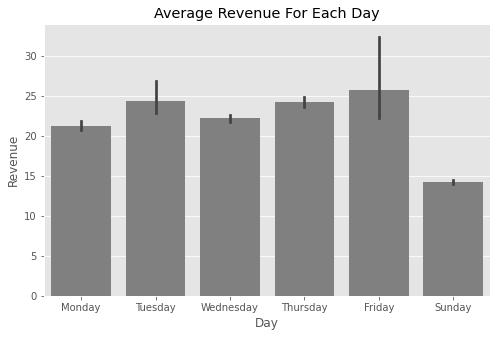

In [35]:
#revenue trend for days of the week
plt.figure(figsize = (8,5))
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Sunday']
sb.barplot(data = filtered_df, x = 'Day', y ='AmountPaid', order = order,color = 'grey')
plt.title('Average Revenue For Each Day')
plt.ylabel('Revenue');

CustomerID
nan      1662045
18102     258518
14646     239034
17450     192231
16446     170091
Name: AmountPaid, dtype: int32


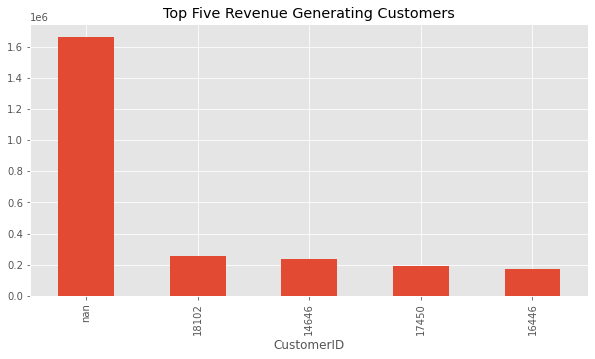

In [36]:
# Top five customers
top_customers = filtered_df.groupby('CustomerID')['AmountPaid'].sum().sort_values(ascending = False).head()
print(top_customers)
top_customers.plot(kind = 'bar' ,figsize =(10,5))
plt.title('Top Five Revenue Generating Customers');


# Monthly and Quarterly sales trends

In [37]:
#monthly and quarterly sales
month_sales = filtered_df.groupby('Month')['AmountPaid'].sum().sort_values(ascending = False)
print(month_sales)

quarter_sales = filtered_df.groupby('Quarter')['AmountPaid'].sum().sort_values(ascending = False)
quarter_sales

Month
November     1349975
December     1332949
October      1014931
September     929897
May           678791
June          672792
August        667460
March         632675
July          620980
January       618239
April         464301
February      456164
Name: AmountPaid, dtype: int32


Quarter
4    3697855
3    2218337
2    1815884
1    1707078
Name: AmountPaid, dtype: int32

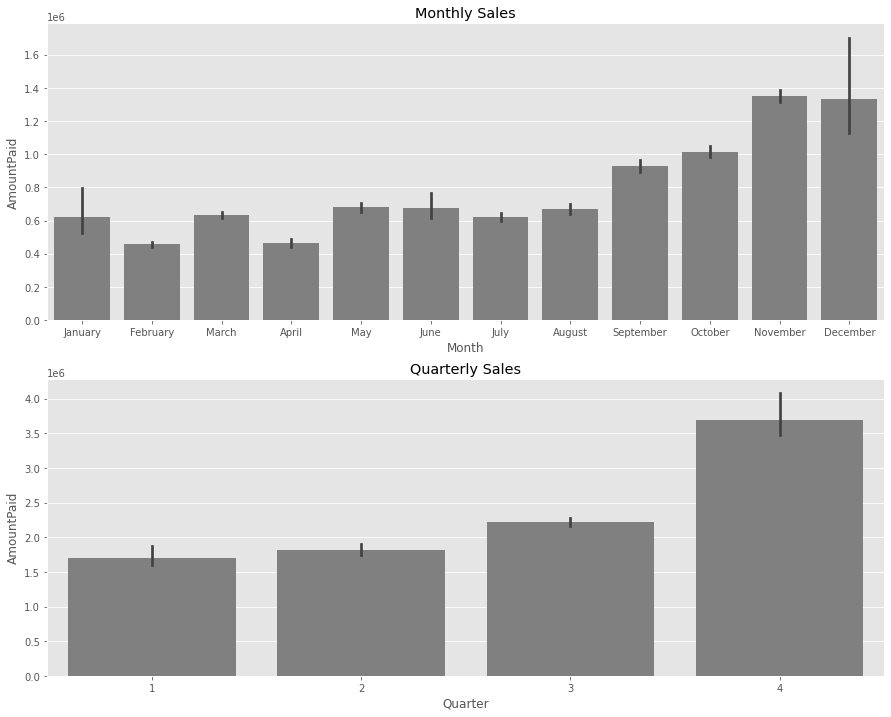

In [38]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

order = ['January','February','March','April','May','June','July','August','September',
         'October','November','December']
sb.barplot(ax = axes[0],data = filtered_df, x = 'Month', y = 'AmountPaid', estimator = sum, color = 'grey',order = order)
axes[0].set_title('Monthly Sales')

sb.barplot(ax = axes[1],data = filtered_df, x = 'Quarter', y = 'AmountPaid', estimator = sum, color = 'grey')
axes[1].set_title('Quarterly Sales');

# Relationship between Quantity of items sold and Revenue

Correlation coefficient:  0.9113776879541916


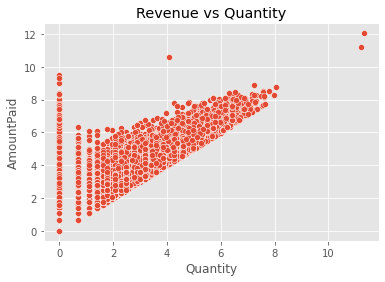

In [39]:
print('Correlation coefficient: ',np.corrcoef(filtered_df['Quantity'],filtered_df['AmountPaid'])[0,1])
sb.scatterplot(data = filtered_df, x = np.log(filtered_df['Quantity']), y =np.log(filtered_df['AmountPaid']))
plt.title('Revenue vs Quantity');

In [40]:
from scipy.stats import pearsonr

pearsonr(filtered_df['Quantity'], filtered_df['AmountPaid'])

(0.91137768795419, 0.0)

# Top five countries that generated high revenue

In [41]:
#top five countries

top_country = filtered_df.groupby('Country')['AmountPaid'].sum().sort_values(ascending = False)
top_country.head()

Country
United Kingdom    8012072
Ireland            251272
Netherlands        243137
Germany            199828
France             181919
Name: AmountPaid, dtype: int32

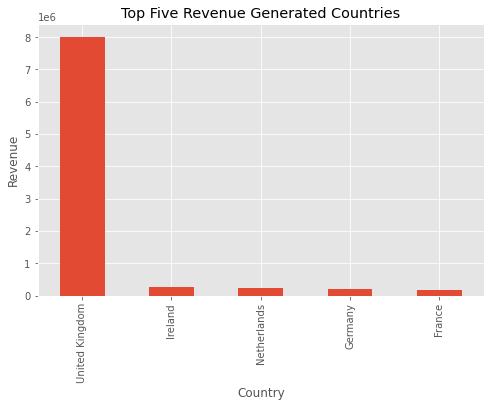

In [42]:
#top five countries with high revenue
top_five = filtered_df.groupby('Country')['AmountPaid'].sum().sort_values(ascending = False).head()
top_five.plot(kind = 'bar',figsize = (8,5))
plt.ylabel('Revenue')
plt.title('Top Five Revenue Generated Countries');

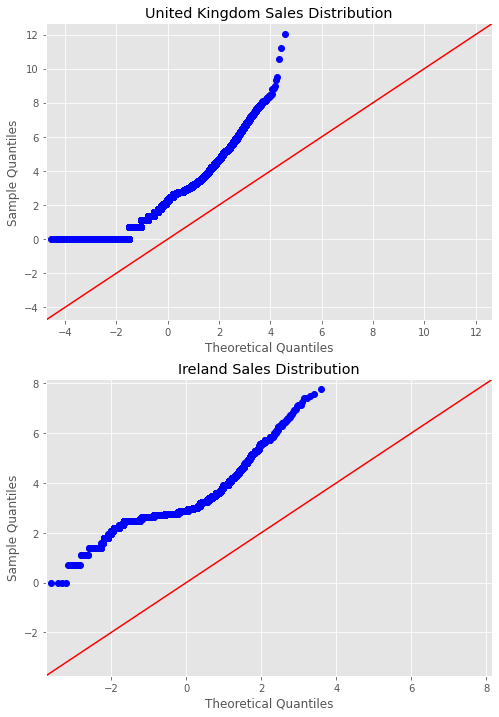

In [43]:
import statsmodels.api as sm

fig, axes = plt.subplots(2, 1, figsize=(8, 12))
df =np.log(filtered_df[filtered_df['Country'] == 'United Kingdom']['AmountPaid'])
           
df1=np.log(filtered_df[filtered_df['Country'] == 'Ireland']['AmountPaid'])

sm.qqplot(ax = axes[0], data = df, line ='45')
axes[0].set_title('United Kingdom Sales Distribution') 

sm.qqplot(ax = axes[1], data = df1, line ='45')
axes[1].set_title('Ireland Sales Distribution');

In [44]:
from scipy.stats import levene

#choose alpha
significance_level = 0.05

# Extract the sales data for each country
sales_by_country = filtered_df.groupby('Country')['AmountPaid']

# Perform Levene's test
statistic, p_value = levene(sales_by_country.get_group('United Kingdom'), sales_by_country.get_group('Ireland'), 
                            center = 'mean')
print(statistic, p_value)

# If the p-value is less than 0.05, the variances are not equal
if p_value < significance_level:
    print("The variances are not equal.")
else:
    print("The variances are equal.")

15.933001434235685 6.563639202912273e-05
The variances are not equal.


In [45]:
from scipy.stats import mannwhitneyu

#Extract revenue data for each country
sales_by_country = filtered_df.groupby('Country')['AmountPaid']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(sales_by_country.get_group('United Kingdom'), sales_by_country.get_group('Ireland'))

print(statistic,p_value)

# If the p-value is less than 0.05, the difference in mean sales is statistically significant
if p_value < 0.05:
    print("The difference in mean sales is statistically significant.")
else:
    print("The difference in mean sales is not statistically significant.")

577523684.0 0.0
The difference in mean sales is statistically significant.


In [46]:
top_five= filtered_df.groupby('Country')['Quantity'].sum().sort_values(ascending = False).head()
top_five

Country
United Kingdom    2925701
Netherlands        127131
Ireland             87498
Germany             72129
France              68468
Name: Quantity, dtype: int64

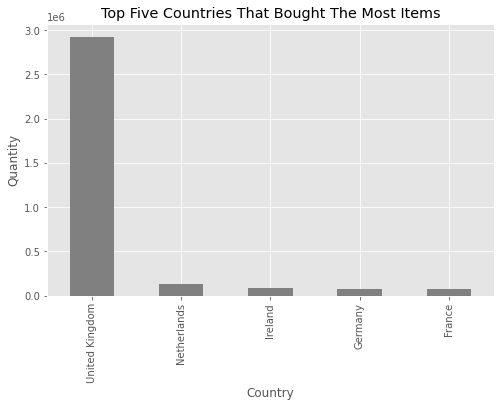

In [47]:
top_five_C = filtered_df.groupby('Country')['Quantity'].sum().sort_values(ascending = False).head()
top_five_C.plot(kind = 'bar',figsize = (8,5),color = 'grey')
plt.ylabel('Quantity')
plt.title('Top Five Countries That Bought The Most Items');

Correlation coefficient:  0.9121531905539757


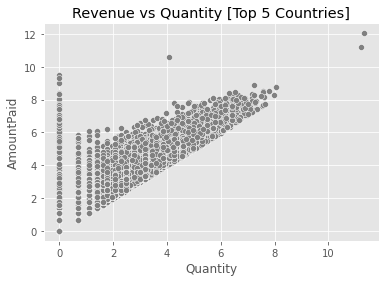

In [48]:
top_5 = filtered_df[filtered_df['Country'].isin(['United Kingdom','Netherlands','Ireland','Germany','France'])]
print('Correlation coefficient: ',np.corrcoef(top_5['Quantity'],top_5['AmountPaid'])[0,1])
sb.scatterplot(data = top_5, x = np.log(top_5['Quantity']), y =np.log(top_5['AmountPaid']), color = 'grey')
plt.title('Revenue vs Quantity [Top 5 Countries]');

# Bottom five countries with the least Generated revenue

In [49]:
#countries with the least sales
least_rev= filtered_df.groupby('Country')['AmountPaid'].sum().sort_values(ascending = False).tail() 
least_rev

Country
Brazil            1118
South Africa       969
Bahrain            742
Czech Republic     584
Saudi Arabia       138
Name: AmountPaid, dtype: int32

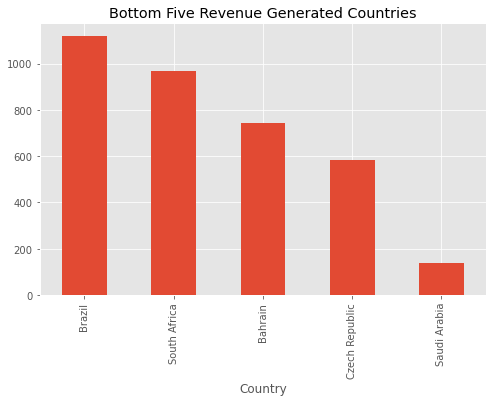

In [50]:
#Plot a column chart to show bottom 5 countries
bottom_five = filtered_df.groupby('Country')['AmountPaid'].sum().sort_values(ascending = False).tail()
bottom_five.plot(kind = 'bar',figsize = (8,5))
plt.title('Revenue')
plt.title('Bottom Five Revenue Generated Countries');

# Relationship between 'Quantity' and 'AmountPaid' for our bottom five revenue generated countries

Correlation coefficient:  0.6661353189290334


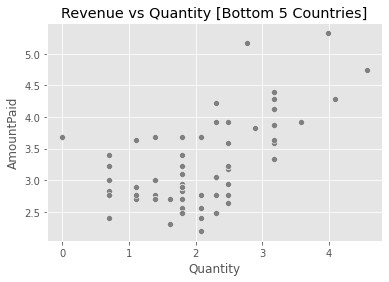

In [51]:
#filter data to show only countries of interest

bottom_5 = filtered_df[filtered_df['Country'].isin(['Brazil','South Africa','Bahrain','Czech Republic','Saudi Arabia'])]

#print correlation coefficient
print('Correlation coefficient: ',np.corrcoef(bottom_5['Quantity'],bottom_5['AmountPaid'])[0,1])

#plot a scatter plot
sb.scatterplot(data = bottom_5, x = np.log(bottom_5['Quantity']), y =np.log(bottom_5['AmountPaid']), color = 'grey')
plt.title('Revenue vs Quantity [Bottom 5 Countries]');

# A wordcloud showing the most frequent items bought

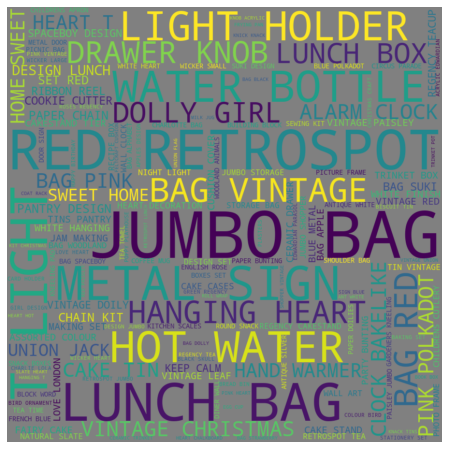

In [52]:
from wordcloud import WordCloud

# combine all the texts into one string
text = " ".join(review for review in filtered_df['Description'])

# create a word cloud object and generate the word cloud
wordcloud = WordCloud(width=900, height=900, background_color='grey', min_font_size=10).generate(text)

# plot the word cloud
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()